# Exploratory Data Analysis

Library Versions used
- feature-engine==1.0.2
- joblib==1.0.1
- matplotlib==3.3.4
- numpy==1.20.1
- pandas==1.2.2
- scikit-learn==0.24.1
- scipy==1.6.0
- seaborn==0.11.1
- statsmodels==0.12.2

## Predicting Sale Price of Houses

In [7]:
# handling data
import pandas as pd
import numpy as np

# handling plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
import scipy.stats as stats

# to disply all columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


In [11]:
# Loading Data
data = pd.read_csv('train.csv')

# Data rows and columns 
print(data.shape)

# visualizing data
data.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [17]:
# dropping: id - not really important (house identifier)
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

### Analyzing:
- Targert Var
- Var types (cat. and num.)
- Missing
- Num. types: Discrete, Continuous, Distributions, & Transformations
- Cat. types: Cardinality, Rare Labels, Special mappings
- Additional Reading Resources

 #### Target Var.

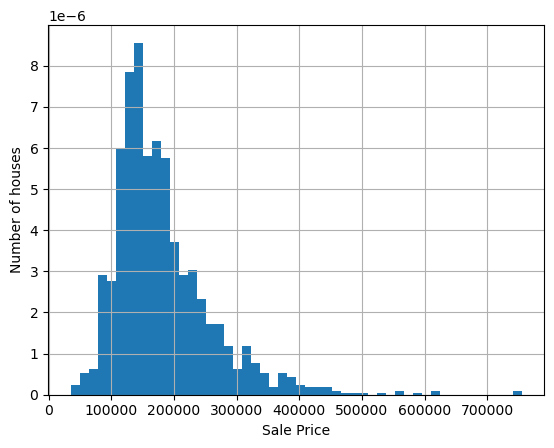

In [27]:
# Building a histogram
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

- Target variable is continous - distribution is positively skewed.
- transforming data to improve the spread of the data.

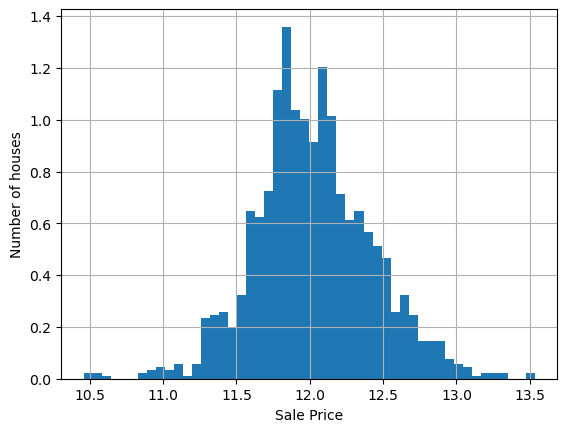

In [31]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

- After transformation, the data is normally distributed (more Gaussian looking).

### Variable Types

In [55]:
#data.info()

In [57]:
# Identifying categorical variables (object)
# Definitions are found in the data_description.txt
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass - cat var by definition despite its numeric values - as found in the data definitions

# adding MSSubClass to the list of cat vars.
cat_vars = cat_vars + ['MSSubClass']

# capturing the number of cat. vars.
len(cat_vars) # totalling 44

44

In [59]:
# Identifying the numcerical variables
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# Capturing the number of num vars.
len(num_vars) # totalling 35

35

### Missing values

In [62]:
# listing variables that contain missing informatin
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Determingin % of missing values (in decimals)
# displaying result ordered by % of missing values

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

- There are a few variables containing most of its values as missing (the top four).
- There are other variables with a small % of missing observations
- In order to train a ML model with this data set, data imputation is necessary.
- Below is a visualization of the missing values in the above list. 

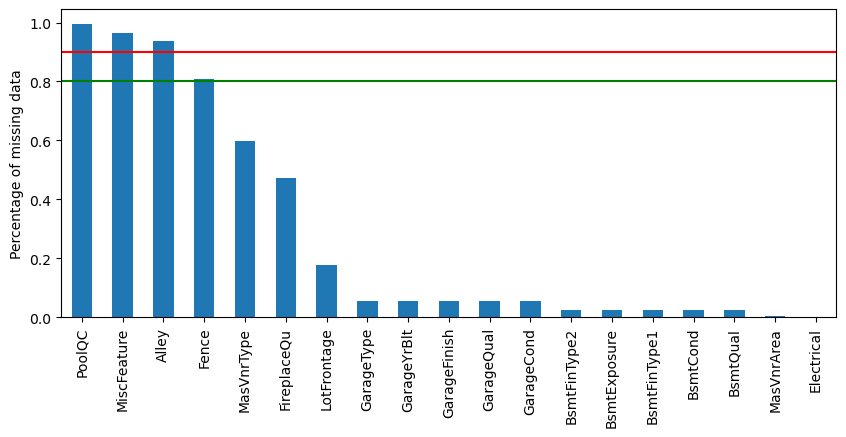

In [67]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [69]:
# determing which from the missing data list is num. and cat.

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of Cat. Vars: ', len(cat_na))
print('Number of Num. Vars: ', len(num_na))

Number of Cat. Vars:  16
Number of Num. Vars:  3


In [71]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [73]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Relationship between missing data and Sale Price
- Evaluating the price of the house in observations where there is missing information. 
- Doing this for each variable showing missing data
- NOTE: I've never done this before

In [78]:
def analyse_na_value(df, var):
    
    # copy data so we don't override og data.
    df = df.copy()

    # making interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparing median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determining median price in 1, 0 groups,
    # and SD of the sale price,
    # and capturing results in a temp dataset
    tmp=df.groupby(var)['SalePrice'].agg(['mean','std'])

    # ploting into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

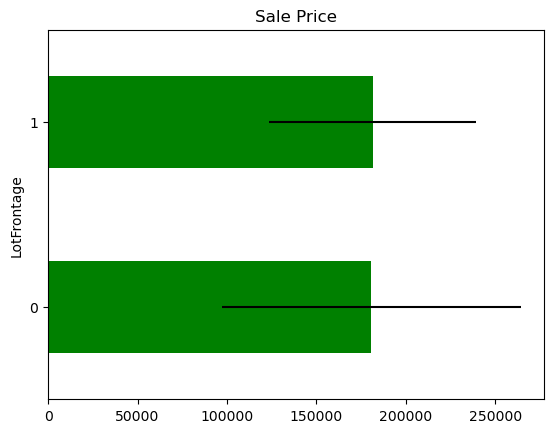

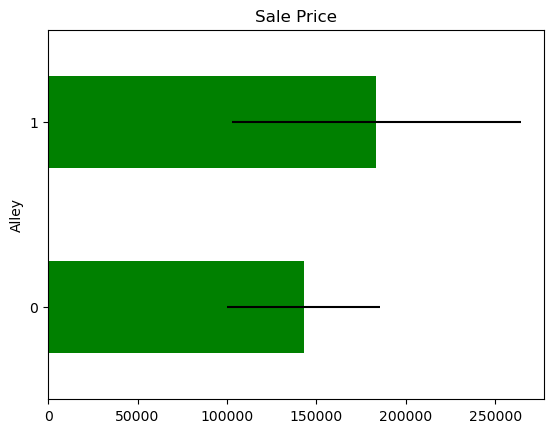

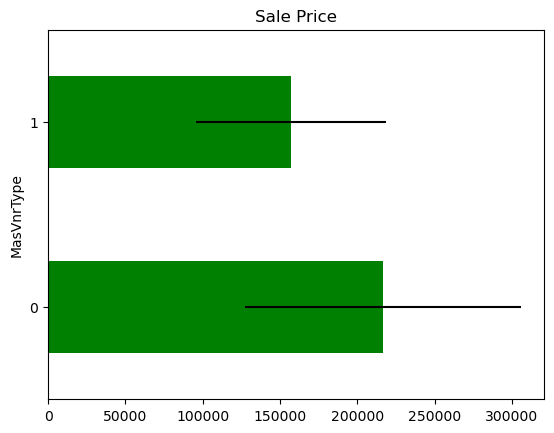

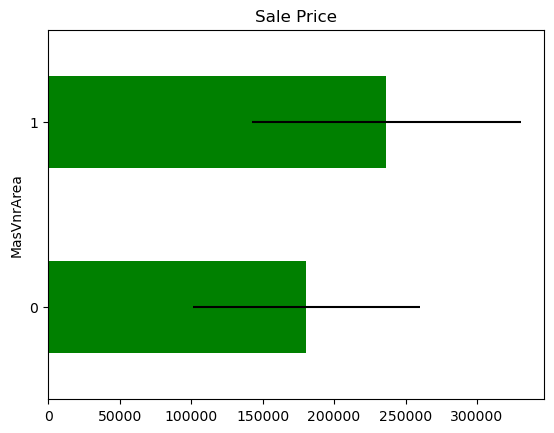

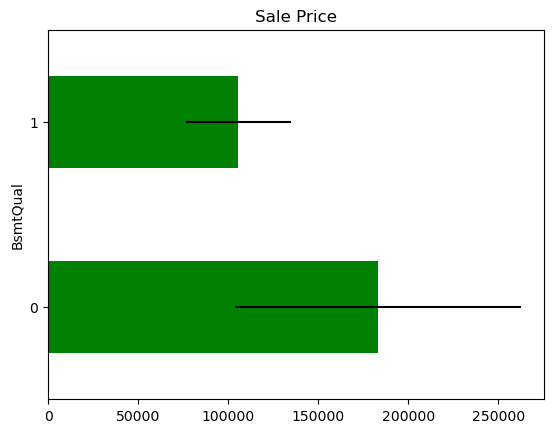

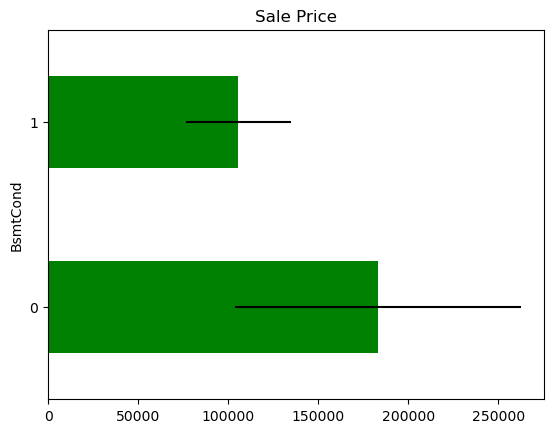

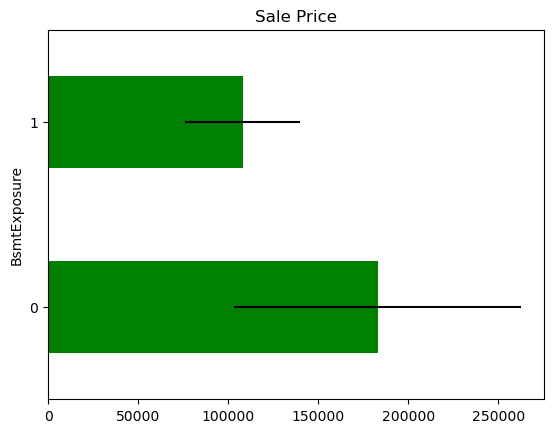

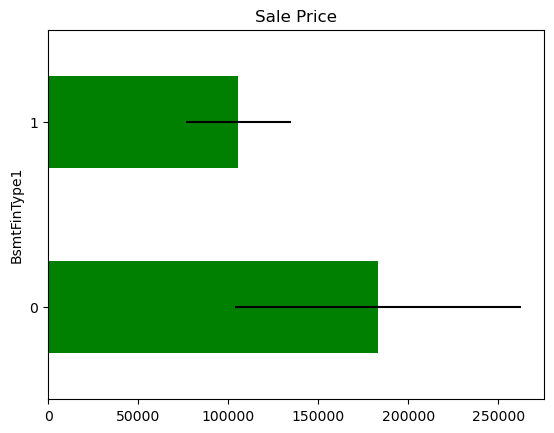

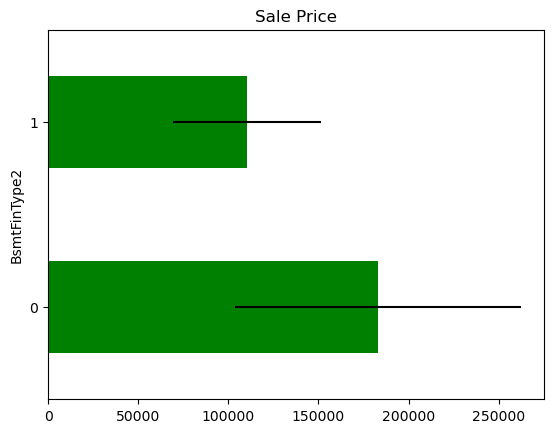

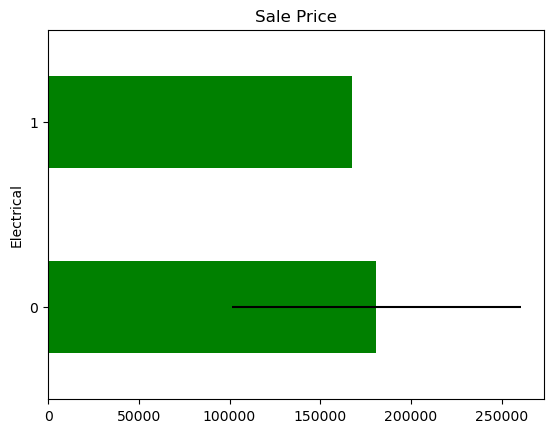

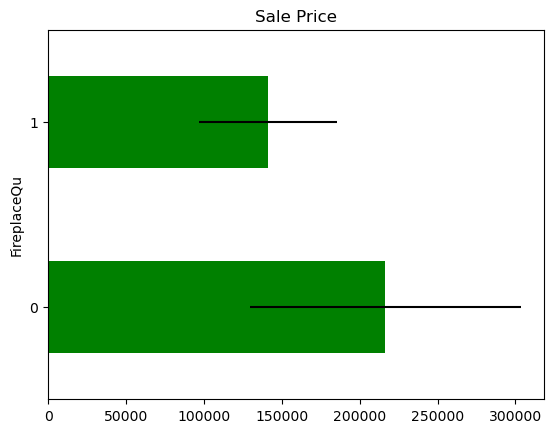

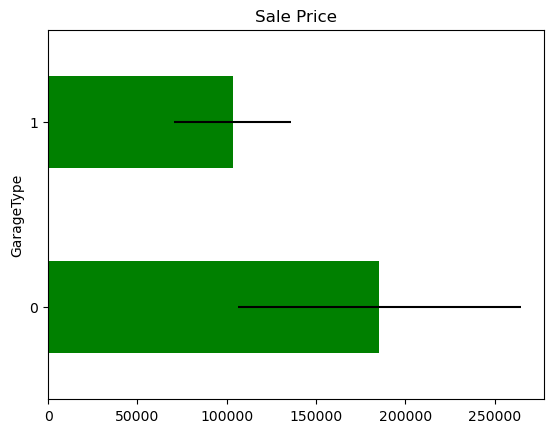

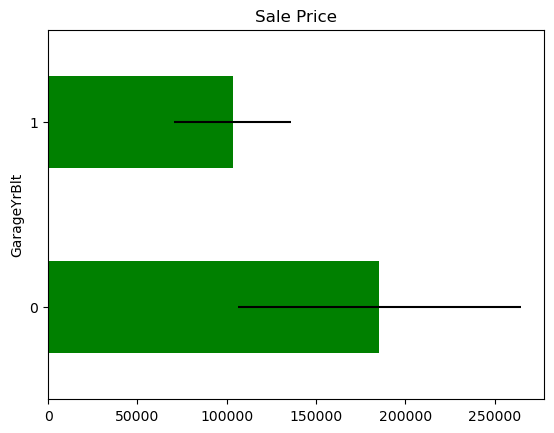

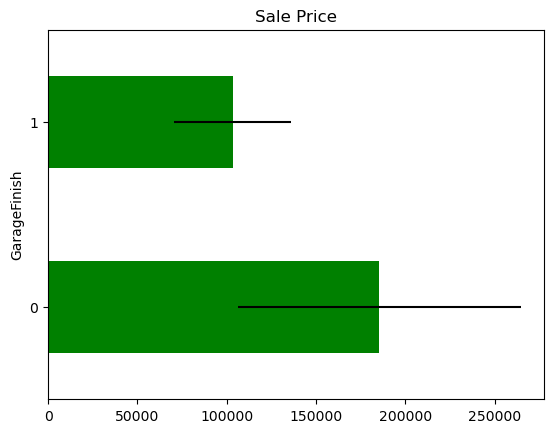

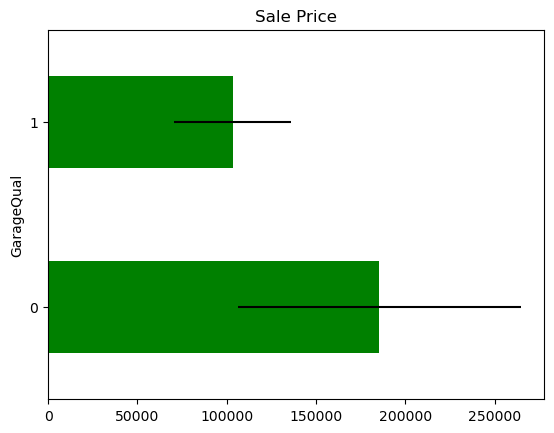

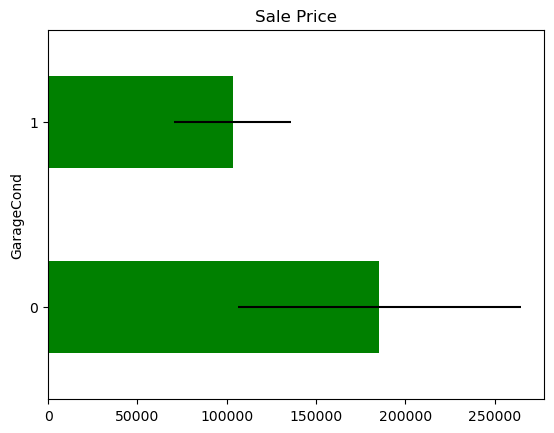

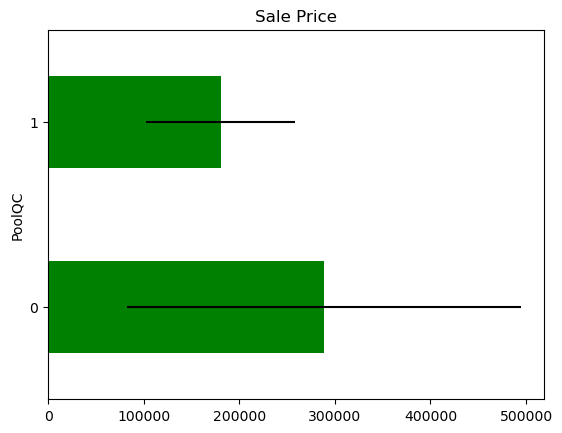

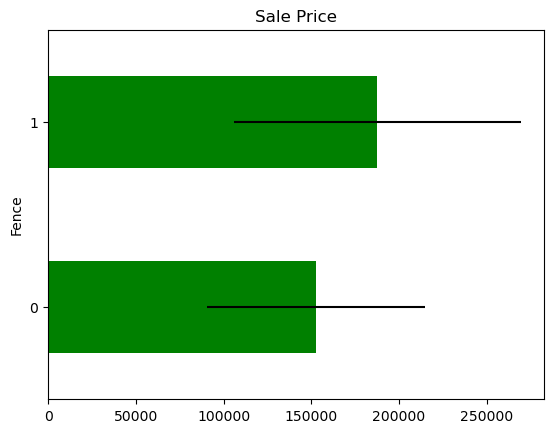

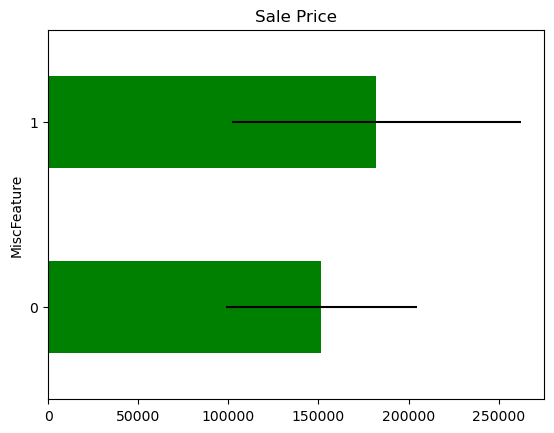

In [80]:
# Running the above function

for var in vars_with_na:
    analyse_na_value(data, var) 
    
    # This is neat
    # and very useful!!